LET'S BUILD A MULTICLASS CLASSIFICATION MODEL 

# IMPORT LIBRARIES AND PREPROCESS DATA

In [ ]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd 
import numpy as np 

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split  


In [ ]:
'''

# get rid of single quote marks in the csv
# 'breast' had a space (so I removed all spaces)

text = open('/content/drive/MyDrive/Colab Notebooks/breast_cancer_data/breast-cancer-1.csv', "r")

text = ''.join([i for i in text]).replace("'", "").replace(" ","")

x = open("/content/drive/MyDrive/Colab Notebooks/breast_cancer_data/breast-cancer-3.csv","w")
x.writelines(text)


'''

'\n\n# get rid of single quote marks in the csv\n# \'breast\' had a space (so I removed all spaces)\n\ntext = open(\'/content/drive/MyDrive/Colab Notebooks/breast_cancer_data/breast-cancer-1.csv\', "r")\n\ntext = \'\'.join([i for i in text]).replace("\'", "").replace(" ","")\n\nx = open("/content/drive/MyDrive/Colab Notebooks/breast_cancer_data/breast-cancer-3.csv","w")\nx.writelines(text)\n\n\n'

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/breast_cancer_data/breast-cancer-3.csv')

df.head(10)

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events
5,50-59,premeno,25-29,3-5,no,2,right,left_up,yes,no-recurrence-events
6,50-59,ge40,40-44,0-2,no,3,left,left_up,no,no-recurrence-events
7,40-49,premeno,10-14,0-2,no,2,left,left_up,no,no-recurrence-events
8,40-49,premeno,0-4,0-2,no,2,right,right_low,no,no-recurrence-events
9,40-49,ge40,40-44,15-17,yes,2,right,left_up,yes,no-recurrence-events


In [ ]:
###
###
###
# I'm going to see if I can help this subpar model (despite that has imbalanced classes) by reducing class imbalance.
###
###
###



In [ ]:
# delete rows with NaN in them

df = df.dropna()

'''
See also:
DataFrame.isna: Indicate missing values.
DataFrame.notna : Indicate existing (non-missing) values.
DataFrame.fillna : Replace missing values.
Series.dropna : Drop missing values.
Index.dropna : Drop missing indices.'''

# NaN was in row 20, now row 20 is gone, see...
print(df.iloc[19:22])


print(df)

'''
# the other thing we could do is replace NaNs with mean nums... 

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

df = imputer.fit_transform(df.values)
'''


      age menopause tumor-size  ... breast-quad irradiat                 class
19  50-59      ge40      20-24  ...     left_up       no  no-recurrence-events
21  60-69      ge40      40-44  ...     left_up      yes  no-recurrence-events
22  50-59      ge40      15-19  ...    left_low       no  no-recurrence-events

[3 rows x 10 columns]
       age menopause tumor-size  ... breast-quad irradiat                 class
0    40-49   premeno      15-19  ...     left_up       no     recurrence-events
1    50-59      ge40      15-19  ...     central       no  no-recurrence-events
2    50-59      ge40      35-39  ...    left_low       no     recurrence-events
3    40-49   premeno      35-39  ...    left_low      yes  no-recurrence-events
4    40-49   premeno      30-34  ...    right_up       no     recurrence-events
..     ...       ...        ...  ...         ...      ...                   ...
281  50-59      ge40      30-34  ...    left_low       no  no-recurrence-events
282  50-59   premeno 

"\n# the other thing we could do is replace NaNs with mean nums... \n\nfrom sklearn.impute import SimpleImputer\n\nimputer = SimpleImputer(missing_values=np.nan, strategy='mean')\n\ndf = imputer.fit_transform(df.values)\n"

## remove_rows function

In [ ]:
def remove_rows(dataframe_name, col, col_var_to_reduce, target_num_to_remain=0):
  '''
  col and col_var_to_reduce are strings
  '''
  print(col, col_var_to_reduce)

  get_idxs_of_col_var_to_reduce = dataframe_name.index[ dataframe_name[col]==col_var_to_reduce ].tolist()

  get_idxs_of_col_var_to_reduce = np.asarray(get_idxs_of_col_var_to_reduce) # convert list to np array 

  print(len(get_idxs_of_col_var_to_reduce)) 

  # get a random sample of unique idxs from get_idxs_of_col_var_to_reduce array

  np.random.seed(42) # set random seed for reproducible results

  idxs_to_drop_from_df = np.random.choice(get_idxs_of_col_var_to_reduce, size=len(get_idxs_of_col_var_to_reduce)-target_num_to_remain, replace=False)

  print(idxs_to_drop_from_df)

  # drop these idxs from df

  dataframe_name = dataframe_name.drop(idxs_to_drop_from_df, axis=0, inplace=True) # inplace=True mutates ori df


In [ ]:
remove_rows(dataframe_name=df, col='breast-quad', col_var_to_reduce='left_low', target_num_to_remain=20)

remove_rows(dataframe_name=df, col='breast-quad', col_var_to_reduce='left_up', target_num_to_remain=20)

remove_rows(dataframe_name=df, col='breast-quad', col_var_to_reduce='right_up', target_num_to_remain=20)

remove_rows(dataframe_name=df, col='breast-quad', col_var_to_reduce='right_low', target_num_to_remain=20)

remove_rows(dataframe_name=df, col='breast-quad', col_var_to_reduce='central', target_num_to_remain=20)


breast-quad left_low
106
[273  35  22 229 267 191  97 102 256  38 143 133   2 222  63 184 197 226
 157 135  40 228 182  80  70 100 137 209  56 220 119 246  34 153 262  88
 127  24 282 217 125 111  57 162 106  28 134 192 205  81  66 242 249  76
 202 147  42  75  14  60 123  29 269  26 199 281 239 154 148 274 140 208
 178 284 235 129 164 145 251 163 212 101 270 169 183 247]
breast-quad left_up
94
[110  55 159 214   0  82 103 193  19 117 236  94 272 175  23   9  47  85
 138 181  33 194 224  87  91  21 187 196  89 223  18 201  11 115 126  36
 118  93  16 227  83  48 221  68 156  25  64   7  46  99  17 215  13 268
  96 259 160 280 158 116 141 219 121 177 174 275 237 112 168 128 233 161
  90 260]
breast-quad right_up
33
[283 132 252 155  78  79 179 186 113   4  45 151  53]
breast-quad right_low
23
[210 185   8]
breast-quad central
21
[1]


In [ ]:
df

# note that now we have a smaller dataset BUT with equal num of class samples

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,class
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
5,50-59,premeno,25-29,3-5,no,2,right,left_up,yes,no-recurrence-events
6,50-59,ge40,40-44,0-2,no,3,left,left_up,no,no-recurrence-events
10,50-59,premeno,25-29,0-2,no,2,left,left_low,no,no-recurrence-events
12,50-59,ge40,30-34,0-2,no,1,right,central,no,no-recurrence-events
...,...,...,...,...,...,...,...,...,...,...
276,40-49,premeno,25-29,0-2,no,2,left,left_up,yes,no-recurrence-events
277,40-49,premeno,35-39,0-2,no,2,right,right_up,no,no-recurrence-events
278,50-59,premeno,30-34,3-5,yes,2,left,left_low,yes,no-recurrence-events
279,40-49,premeno,20-24,0-2,no,2,right,right_up,no,no-recurrence-events


# PREP COLUMN_TRANSFORMER

In [ ]:
# prep column_transformer
# in this instance, we will encode all X variables with OHE (using OE throws an error)

ct = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore', sparse=False), ['age', 'tumor-size', 'inv-nodes', 'menopause', 'node-caps','deg-malig', 'breast', 'irradiat', 'class'])
)




 # DEFINE AND ENCODE Y

In [ ]:
# encode the dependent variable, y

'''
le = LabelEncoder()
y = df['breast-quad']
y = le.fit_transform(y)
!!! Got better val_loss result when I used OHE on the y variable instead of LE
'''

ohe = OneHotEncoder(sparse=False) # sparse=False or we will get a non-tensor shape

y = df[['breast-quad']] # add double square brackets or we'll get a shape error

y = ohe.fit_transform(y)

y[:10], y.shape

(array([[0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0.]]), (100, 5))

# DEFINE X 


In [ ]:
# define X 

X = df.drop('breast-quad', axis='columns')

X, y, X.shape, y.shape

(       age menopause tumor-size  ... breast irradiat                 class
 3    40-49   premeno      35-39  ...  right      yes  no-recurrence-events
 5    50-59   premeno      25-29  ...  right      yes  no-recurrence-events
 6    50-59      ge40      40-44  ...   left       no  no-recurrence-events
 10   50-59   premeno      25-29  ...   left       no  no-recurrence-events
 12   50-59      ge40      30-34  ...  right       no  no-recurrence-events
 ..     ...       ...        ...  ...    ...      ...                   ...
 276  40-49   premeno      25-29  ...   left      yes  no-recurrence-events
 277  40-49   premeno      35-39  ...  right       no  no-recurrence-events
 278  50-59   premeno      30-34  ...   left      yes  no-recurrence-events
 279  40-49   premeno      20-24  ...  right       no  no-recurrence-events
 285  50-59      ge40      40-44  ...   left       no  no-recurrence-events
 
 [100 rows x 9 columns], array([[0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
  

# DEFINE TRAINING, VALIDATION AND TEST DATASETS
- I increased the X_train y_train set to 90% to get better results when I fit the model, ie 60% val accuracy 

In [ ]:
# get training, validation and test datasets (90:5:5 ratio)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
 
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)
# (193, 9) (193,) (84, 9) (84,)
 
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)
 
print(X_val.shape, y_val.shape, X_test.shape, y_test.shape)
# (42, 9) (42,) (42, 9) (42,)

print('X_train: ' + str(X_train))
 
print('y_train: ' + str(y_train))
 
print('X_val: ' + str(X_val))
 
print('y_val: ' + str(y_val))
 
print('X_test: ' + str(X_test))
 
print('y_test: ' + str(y_test))



(90, 9) (90, 5) (10, 9) (10, 5)
(5, 9) (5, 5) (5, 9) (5, 5)
X_train:        age menopause tumor-size  ... breast irradiat                 class
59   30-39   premeno        0-4  ...  right       no     recurrence-events
95   40-49   premeno      45-49  ...   left      yes  no-recurrence-events
225  60-69      ge40      30-34  ...  right       no  no-recurrence-events
105  60-69      ge40      30-34  ...   left      yes     recurrence-events
261  30-39   premeno      25-29  ...   left       no  no-recurrence-events
..     ...       ...        ...  ...    ...      ...                   ...
189  50-59   premeno      25-29  ...  right       no  no-recurrence-events
216  60-69      ge40      25-29  ...   left       no     recurrence-events
49   50-59      ge40      40-44  ...  right       no  no-recurrence-events
265  50-59      ge40        0-4  ...   left       no  no-recurrence-events
166  60-69      ge40      25-29  ...  right       no     recurrence-events

[90 rows x 9 columns]
y_train:

In [ ]:
X_train

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,irradiat,class
59,30-39,premeno,0-4,0-2,no,2,right,no,recurrence-events
95,40-49,premeno,45-49,0-2,no,2,left,yes,no-recurrence-events
225,60-69,ge40,30-34,0-2,no,1,right,no,no-recurrence-events
105,60-69,ge40,30-34,3-5,yes,2,left,yes,recurrence-events
261,30-39,premeno,25-29,0-2,no,1,left,no,no-recurrence-events
...,...,...,...,...,...,...,...,...,...
189,50-59,premeno,25-29,0-2,no,2,right,no,no-recurrence-events
216,60-69,ge40,25-29,0-2,no,3,left,no,recurrence-events
49,50-59,ge40,40-44,0-2,no,3,right,no,no-recurrence-events
265,50-59,ge40,0-4,0-2,no,2,left,no,no-recurrence-events


In [ ]:
# fit and transform the training data

ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_val_normal = ct.transform(X_val)
X_test_normal = ct.transform(X_test)

print(X_train_normal.shape, X_val_normal.shape, X_test_normal.shape)
print(X_train_normal[0])
print(type(X_train_normal))

(90, 37) (5, 37) (5, 37)
[0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1.]
<class 'numpy.ndarray'>


In [ ]:
# data preprocessing is done, all training data have been encoded to a 0 or 1
# now we can build the model

# BUILD MODEL
- By adding a lot more hidden units (neurons) eg from 10 to 50, and by adding a Dropout layer to help avoid overfitting, I was able to increase the val accuracy from 50% to 60%

In [ ]:
tf.random.set_seed(42)

model_1 = keras.Sequential([
                            keras.layers.Dense(50, activation='relu'),  
                            keras.layers.Dropout(0.2),  
                            keras.layers.Dense(30, activation='relu'),
                            keras.layers.Dense(5, activation='softmax'),

])


In [ ]:
model_1.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics='accuracy')

'''
Both, categorical cross entropy and sparse categorical cross entropy have the same loss function which you have mentioned above. The only difference is the format in which you mention 𝑌𝑖 (i,e true labels).
If your 𝑌𝑖's are one-hot encoded, use categorical_crossentropy. Examples (for a 3-class classification): [1,0,0] , [0,1,0], [0,0,1]
But if your 𝑌𝑖's are integers, use sparse_categorical_crossentropy. Examples for above 3-class classification problem: [1] , [2], [3]
The usage entirely depends on how you load your dataset. One advantage of using sparse categorical cross entropy is it saves time in memory as well as computation because it simply uses a single integer for a class, rather than a whole vector.
'''

"\nBoth, categorical cross entropy and sparse categorical cross entropy have the same loss function which you have mentioned above. The only difference is the format in which you mention 𝑌𝑖 (i,e true labels).\nIf your 𝑌𝑖's are one-hot encoded, use categorical_crossentropy. Examples (for a 3-class classification): [1,0,0] , [0,1,0], [0,0,1]\nBut if your 𝑌𝑖's are integers, use sparse_categorical_crossentropy. Examples for above 3-class classification problem: [1] , [2], [3]\nThe usage entirely depends on how you load your dataset. One advantage of using sparse categorical cross entropy is it saves time in memory as well as computation because it simply uses a single integer for a class, rather than a whole vector.\n"

In [ ]:
history_1 = model_1.fit(
    X_train_normal,
    y_train,
    epochs=6,
    validation_data=(X_val_normal, y_val),
    verbose=2,
)

Epoch 1/6
3/3 - 1s - loss: 1.6107 - accuracy: 0.1889 - val_loss: 1.4877 - val_accuracy: 0.4000
Epoch 2/6
3/3 - 0s - loss: 1.5770 - accuracy: 0.2889 - val_loss: 1.4807 - val_accuracy: 0.4000
Epoch 3/6
3/3 - 0s - loss: 1.5621 - accuracy: 0.2667 - val_loss: 1.4746 - val_accuracy: 0.4000
Epoch 4/6
3/3 - 0s - loss: 1.5581 - accuracy: 0.2889 - val_loss: 1.4706 - val_accuracy: 0.6000
Epoch 5/6
3/3 - 0s - loss: 1.5508 - accuracy: 0.2222 - val_loss: 1.4673 - val_accuracy: 0.6000
Epoch 6/6
3/3 - 0s - loss: 1.5426 - accuracy: 0.2889 - val_loss: 1.4625 - val_accuracy: 0.6000


In [ ]:
# IMPROVEMENT LOG # val_loss: 1.5041 - val_accuracy: 0.4286 , when train-val-test ratio was (70:15:15)
# HIGHEST SCORE TO DATE: val_loss: 1.3646 - val_accuracy: 0.5357, train-val-test ratio revised to (80:10:10)

# EVALUATE MODEL

Text(0.5, 0, 'epochs')

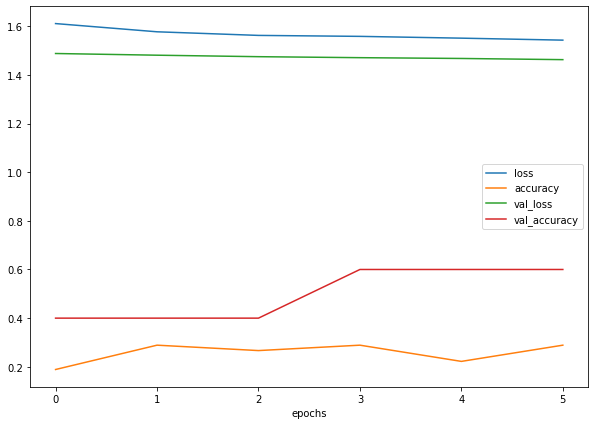

In [ ]:
# loss curve

import matplotlib.pyplot as plt

pd.DataFrame(history_1.history).plot(figsize=(10,7))
plt.xlabel('epochs')

# MAKE A PREDICTION

In [ ]:

# make a prediction with X_test_normal

y_pred = model_1.predict(X_test_normal)

print(y_pred)

# now we clean up y_pred: create one list with the index of largest num in each y_pred result/row 

y_pred = y_pred.argmax(axis=-1)

print(y_pred)


# get the actual results of y_test (pre-encoded)

actual_y_test = ohe.inverse_transform(y_test)

print(y_test)

# reshaped to a 2D tensor for easier comparison

actual_y_test = actual_y_test.ravel()

print(actual_y_test)


# convert y_pred to string labels to compare with actual_y_test. First we manually enter classes by index

classes_by_index = ['central', 'left-low', 'left-up', 'right-low', 'right-up']

# then we append each prediction into a list

y_pred_breast_quad = []

for i in y_pred:
  y_pred_breast_quad.append(classes_by_index[i])

# we convert the list into a numpy array and then into a 2D tensor so we can compare with actual_y_test

#y_pred_breast_quad = np.asarray(y_pred_breast_quad).reshape(4,7)

print(y_pred_breast_quad)


[[0.17695148 0.22128877 0.18655843 0.22437645 0.1908249 ]
 [0.23461069 0.17831686 0.20906167 0.13693775 0.24107307]
 [0.17798425 0.260275   0.15896937 0.24401064 0.15876068]
 [0.2828038  0.18959397 0.12637103 0.20741016 0.19382109]
 [0.17251793 0.23619455 0.2556157  0.1352811  0.20039076]]
[3 4 1 0 2]
[[0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]]
['right_low' 'central' 'left_low' 'left_up' 'right_low']
['right-low', 'right-up', 'left-low', 'central', 'left-up']


In [ ]:
# evaluate val and test outcomes

model_1.evaluate(X_val_normal, y_val), model_1.evaluate(X_test_normal, y_test)


1/1 [==============================] - 0s 17ms/step - loss: 1.6718 - accuracy: 0.4000


([1.4624760150909424, 0.6000000238418579],
 [1.6718413829803467, 0.4000000059604645])

In [ ]:
# Check for "class imbalance" (our class is breast-quad)

c = df.iloc[:, 7:8]

c.value_counts()
'''
breast-quad
right_up       20
right_low      20
left_up        20
left_low       20
central        20
'''
# NO CLASS IMBALANCE bc we dropped rows using our remove_rows function

breast-quad
right_up       20
right_low      20
left_up        20
left_low       20
central        20
dtype: int64

# FINDINGS 

- I get 2 out of 5 correct, testing with unseen data, with this model. This is not a small victory for me as prev models would get 8/28 right ie 28.6% whereas now I can achieve 40% accuracy.
- Remember that this is a very small sample of only 100! 
- Best of all, IMHO, this model is more 'creative' with preds ie [3 4 1 0 2] rather than [1 1 2 1 1 1 1 1 1 1 2 2 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1] previously!
- By **(1) radically fixing class imbalance** (row reduction from 277 to 100) and
- **(2) adding a lot more units per hidden layer** and 
- **(3) adding a Dropout layer**, I was able to improve the model


Excellent article on class imbalance https://journalofbigdata.springeropen.com/articles/10.1186/s40537-019-0192-5 

# SCRIPT DUMP

In [ ]:
'''le = LabelEncoder()

input_labels = ['red', 'black', 'red', 'green', 'black', 'yellow', 'white']

le.fit(input_labels)



test_labels = ['green', 'yellow', 'black']

encoded_values = le.transform(test_labels)

print(encoded_values)



decoded_list = le.inverse_transform(encoded_values)

print(decoded_list)'''

"le = LabelEncoder()\n\ninput_labels = ['red', 'black', 'red', 'green', 'black', 'yellow', 'white']\n\nle.fit(input_labels)\n\n\n\ntest_labels = ['green', 'yellow', 'black']\n\nencoded_values = le.transform(test_labels)\n\nprint(encoded_values)\n\n\n\ndecoded_list = le.inverse_transform(encoded_values)\n\nprint(decoded_list)"

In [ ]:
'''# THE AVERAGE TUMOR SIZE FROM ENCODED DATA IS... 

print(X_train['tumor-size'].mean())
# NB we don't use the normalised X_train 

print()


# GET THE PRE-ENCODED DATA SO WE CAN FIND OUT WHAT AVERAGE TUMOR SIZE FROM ENCODED DATA IS

# pre_encoded = OrdinalEncoder().fit(THE ORIGINAL PRE-ENCODED COLUMN IN 2D ARRAY).inverse_transform(THE POST-ENCODED COLUMN ALSO IN 2D ARRAY)


# get pre_encoded col

pre_encoded = df['tumor-size']

print(pre_encoded.shape) # (277,) shape is not usable, so... 

reshaped_pre_encoded = pre_encoded.to_numpy().reshape(-1,1)

print(reshaped_pre_encoded.shape) # shape is now (277, 1)


# now get post_encoded col

post_encoded = X.iloc[:, 2:3]

print(post_encoded.head(15), '\n', type(post_encoded), '\n', post_encoded.shape) # shape is (277, 1)


# now we can inverse transform

pre_encoded_result = OrdinalEncoder().fit(reshaped_pre_encoded).inverse_transform(post_encoded)

print(pre_encoded_result[:15], '\n', type(pre_encoded_result))

# print(len(df['tumor-size']), len(pre_encoded_result)) # both are 277


# FROM THE ABOVE WE CAN CONCLUDE THAT...

# from the mean of 4 (3.98) for tumor-size,
# and from comparing pre- and post-encoded nums,
# mean of 4 (3.98) for tumor-size == ['25-29']
# which means the average tumor size is 25 to 29 (mm?)


# OK so the funny thing is that if we just print reshaped_pre_encoded we will get the pre-encoded data from idx 0
# without having to go thru all the rest of the code!!!
print(reshaped_pre_encoded[:10])
# so we can do this next time :-)
'''

"# THE AVERAGE TUMOR SIZE FROM ENCODED DATA IS... \n\nprint(X_train['tumor-size'].mean())\n# NB we don't use the normalised X_train \n\nprint()\n\n\n# GET THE PRE-ENCODED DATA SO WE CAN FIND OUT WHAT AVERAGE TUMOR SIZE FROM ENCODED DATA IS\n\n# pre_encoded = OrdinalEncoder().fit(THE ORIGINAL PRE-ENCODED COLUMN IN 2D ARRAY).inverse_transform(THE POST-ENCODED COLUMN ALSO IN 2D ARRAY)\n\n\n# get pre_encoded col\n\npre_encoded = df['tumor-size']\n\nprint(pre_encoded.shape) # (277,) shape is not usable, so... \n\nreshaped_pre_encoded = pre_encoded.to_numpy().reshape(-1,1)\n\nprint(reshaped_pre_encoded.shape) # shape is now (277, 1)\n\n\n# now get post_encoded col\n\npost_encoded = X.iloc[:, 2:3]\n\nprint(post_encoded.head(15), '\n', type(post_encoded), '\n', post_encoded.shape) # shape is (277, 1)\n\n\n# now we can inverse transform\n\npre_encoded_result = OrdinalEncoder().fit(reshaped_pre_encoded).inverse_transform(post_encoded)\n\nprint(pre_encoded_result[:15], '\n', type(pre_encoded_resu

In [ ]:
'''
# TURN SERIES WITH VALUE COUNTS INTO NEW, USABLE DATAFRAME

series = df.value_counts().to_frame()
# note that a is a pandas series, which is what value_counts() creates, 
# while to_frame() turns it into a dataframe with shape of (n, 1)

print(series)

print(series.shape) # (263, 1)

print()

counts_only = tf.constant(series)

print(counts_only[:3]) # see first 3

print()

counts_only = np.ravel(counts_only) # convert counts_only shape to 1D array (n, )

print(counts_only, counts_only.shape)

print()

print(series.index[0], series.index[1], series.index[2]) # we get tuples of each row!

print()

temp_list = []

for i in range(len(series)):
  each_list = list(series.index[i]) # convert each tuple into a list
  each_count = counts_only[i] # get each count
  each_list.append(each_count) # add each_count to each_list list
  temp_list.append(each_list) # add each_list to temp_list

stacked_arr = np.row_stack( ( temp_list ) )

print(stacked_arr, stacked_arr.shape)
'''

'\n# TURN SERIES WITH VALUE COUNTS INTO NEW, USABLE DATAFRAME\n\nseries = df.value_counts().to_frame()\n# note that a is a pandas series, which is what value_counts() creates, \n# while to_frame() turns it into a dataframe with shape of (n, 1)\n\nprint(series)\n\nprint(series.shape) # (263, 1)\n\nprint()\n\ncounts_only = tf.constant(series)\n\nprint(counts_only[:3]) # see first 3\n\nprint()\n\ncounts_only = np.ravel(counts_only) # convert counts_only shape to 1D array (n, )\n\nprint(counts_only, counts_only.shape)\n\nprint()\n\nprint(series.index[0], series.index[1], series.index[2]) # we get tuples of each row!\n\nprint()\n\ntemp_list = []\n\nfor i in range(len(series)):\n  each_list = list(series.index[i]) # convert each tuple into a list\n  each_count = counts_only[i] # get each count\n  each_list.append(each_count) # add each_count to each_list list\n  temp_list.append(each_list) # add each_list to temp_list\n\nstacked_arr = np.row_stack( ( temp_list ) )\n\nprint(stacked_arr, stack

In [ ]:
'''# we onehotencode these rows with pandas get_dummies(): breast, breast-quad

df = pd.get_dummies(data=df, columns=['breast', 'breast-quad'])

df'''

"# we onehotencode these rows with pandas get_dummies(): breast, breast-quad\n\ndf = pd.get_dummies(data=df, columns=['breast', 'breast-quad'])\n\ndf"

## FUNCTION TO REMOVE ROWS IN COLUMNS THAT MEET CRITERIUM

In [ ]:
def remove_rows(dataframe_name, col, col_var_to_reduce, target_num_to_remain=0):
  '''
  col and col_var_to_reduce are strings
  '''
  print(col, col_var_to_reduce)

  get_idxs_of_col_var_to_reduce = dataframe_name.index[ dataframe_name[col]==col_var_to_reduce ].tolist()

  get_idxs_of_col_var_to_reduce = np.asarray(get_idxs_of_col_var_to_reduce) # convert list to np array 

  print(len(get_idxs_of_col_var_to_reduce)) 

  # get a random sample of unique idxs from get_idxs_of_col_var_to_reduce array

  np.random.seed(42) # set random seed for reproducible results

  idxs_to_drop_from_df = np.random.choice(get_idxs_of_col_var_to_reduce, size=len(get_idxs_of_col_var_to_reduce)-target_num_to_remain, replace=False)

  print(idxs_to_drop_from_df)

  # drop these idxs from df

  dataframe_name = dataframe_name.drop(idxs_to_drop_from_df, axis=0, inplace=True) # inplace=True mutates ori df


###

# run function...

#remove_rows(dataframe_name=df, col='breast-quad', col_var_to_reduce='left_low', target_num_to_remain=20)






'''
# SOURCE CODE FOR FUNCTION

left_low_idx = df.index[ df['breast-quad']=='left_low'].tolist()

left_low_idx = np.asarray(left_low_idx) # convert list to np array 

print(len(left_low_idx)) # 106, same as val count output

print(left_low_idx)

# let's reduce all target vars count to N
# so let's pick N idx numbers to delete from the dataframe, based on the idx nums of left_low rows

target_num_to_remain = 20

np.random.seed(42)


# get a random sample of unique idxs only from left_low_idx

idxs_to_drop_from_df = np.random.choice(left_low_idx, size=len(left_low_idx)-target_num_to_remain, replace=False)

print(idxs_to_drop_from_df, len(idxs_to_drop_from_df))


# drop these idxs from df

df = df.drop(idxs_to_drop_from_df, axis=0, inplace=True)

print(df)
'''


###






"\n# SOURCE CODE FOR FUNCTION\n\nleft_low_idx = df.index[ df['breast-quad']=='left_low'].tolist()\n\nleft_low_idx = np.asarray(left_low_idx) # convert list to np array \n\nprint(len(left_low_idx)) # 106, same as val count output\n\nprint(left_low_idx)\n\n# let's reduce all target vars count to N\n# so let's pick N idx numbers to delete from the dataframe, based on the idx nums of left_low rows\n\ntarget_num_to_remain = 20\n\nnp.random.seed(42)\n\n\n# get a random sample of unique idxs only from left_low_idx\n\nidxs_to_drop_from_df = np.random.choice(left_low_idx, size=len(left_low_idx)-target_num_to_remain, replace=False)\n\nprint(idxs_to_drop_from_df, len(idxs_to_drop_from_df))\n\n\n# drop these idxs from df\n\ndf = df.drop(idxs_to_drop_from_df, axis=0, inplace=True)\n\nprint(df)\n"